In [1]:
%pylab inline
import pandas as pd
import pylab as pl
pl.rcParams['figure.figsize'] = (16, 12)
rcParams['figure.dpi'] = 120
autumn()

Populating the interactive namespace from numpy and matplotlib


# Проклятие размерности

In [2]:
# Будем строить графики зависимости различных параметров от размерности пространства
def plot_dim(prop, dims=(1, 30), samples=10000, **kwargs):
    ds = range(dims[0], dims[1] + 1)
    plot(ds, list(map(lambda d: prop(d, samples=samples, **kwargs), ds)))
    xlim(dims)
from scipy.stats import gaussian_kde
def kde_plot(prop, dim, samples=10000, **kwargs):
    vs = array([prop(dim, samples=1, **kwargs) for _ in range(samples)])
    k = gaussian_kde(vs)
    xs = linspace(min(vs), max(vs), num=1000)
    plot(xs, k(xs))

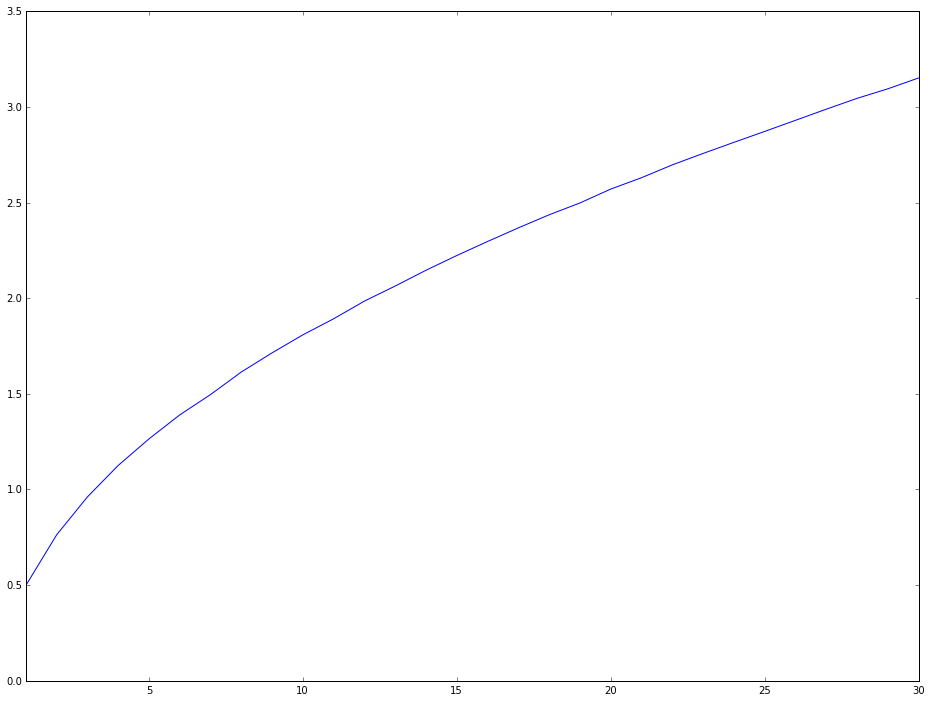

In [3]:
# Средняя норма вектора из единичного куба
def avg_norm(d, samples):
    vs = random.random(size=(samples, d))
    return average(linalg.norm(vs, axis=1))
plot_dim(avg_norm)

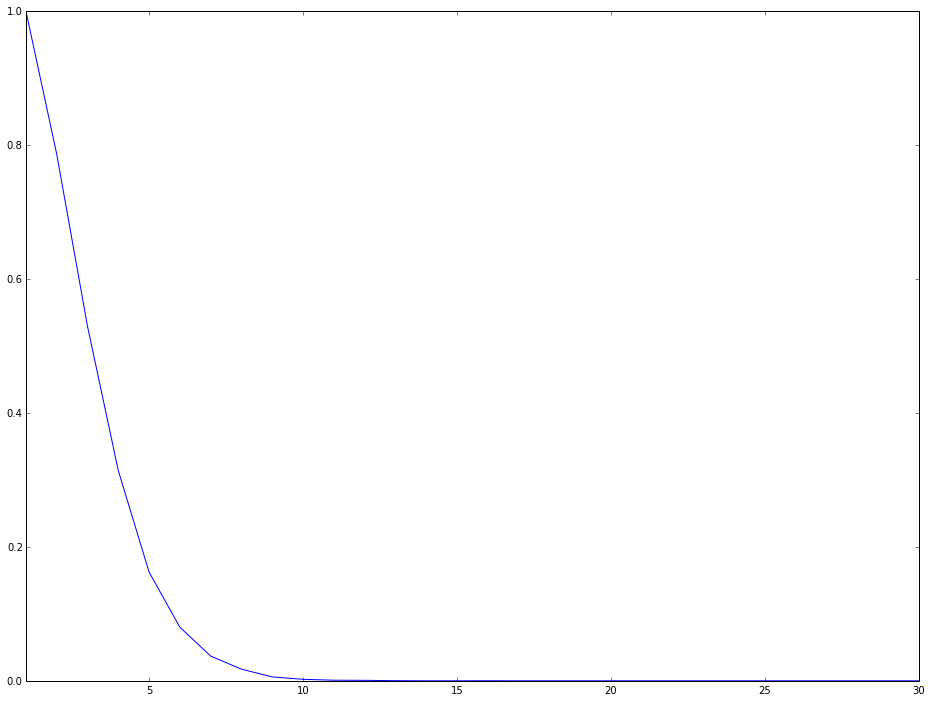

In [4]:
# Отношение объёмов вписанного шара и куба
def volume_ratio(d, samples):
    vs = random.random(size=(samples, d))
    return average(linalg.norm(vs, axis=1) <= 1)
plot_dim(volume_ratio)

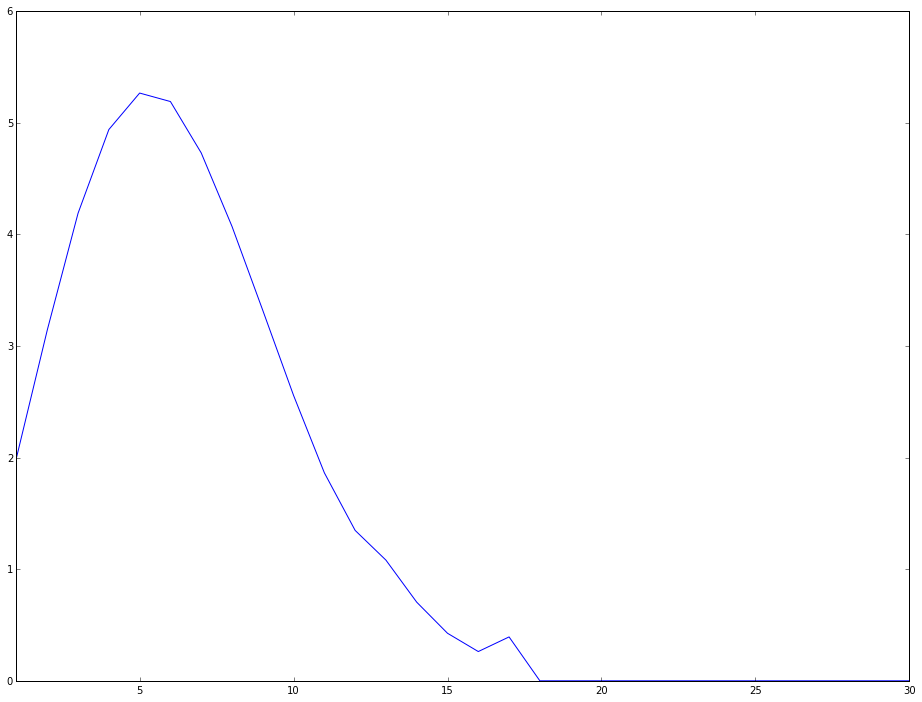

In [5]:
# Объем единичной сферы
def sphere_volume(d, samples):
    return volume_ratio(d, samples) * 2 ** d
plot_dim(sphere_volume, samples=1000000)

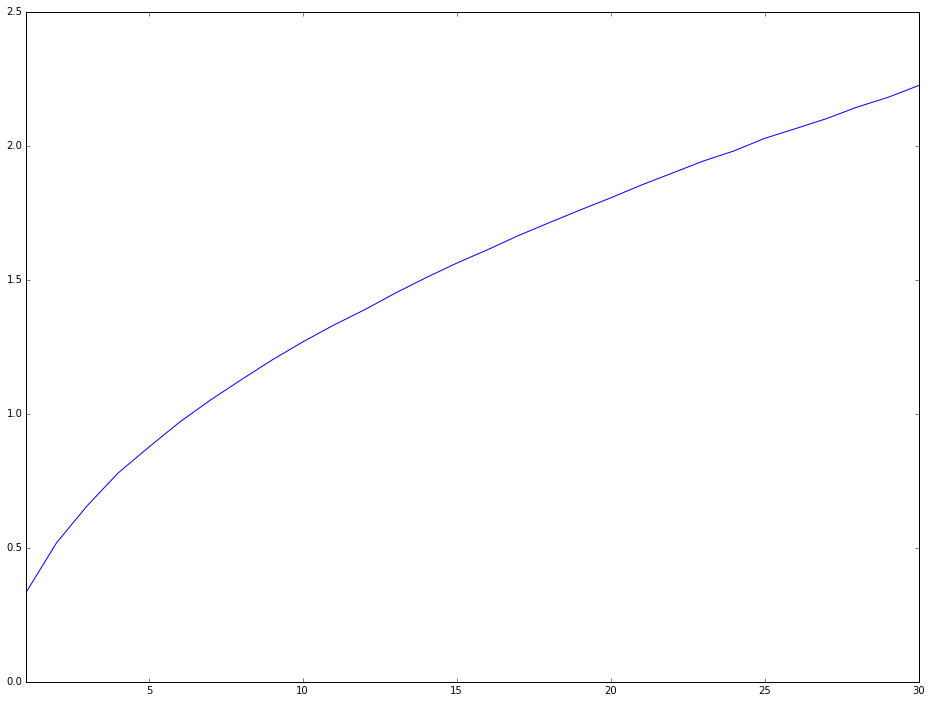

In [6]:
# Расстояние между двумя случайными векторами из единичного куба
def rand_dist(d, samples):
    x = random.random(size=(samples, d))
    y = random.random(size=(samples, d))
    return average(linalg.norm(x - y, axis=1))
plot_dim(rand_dist)

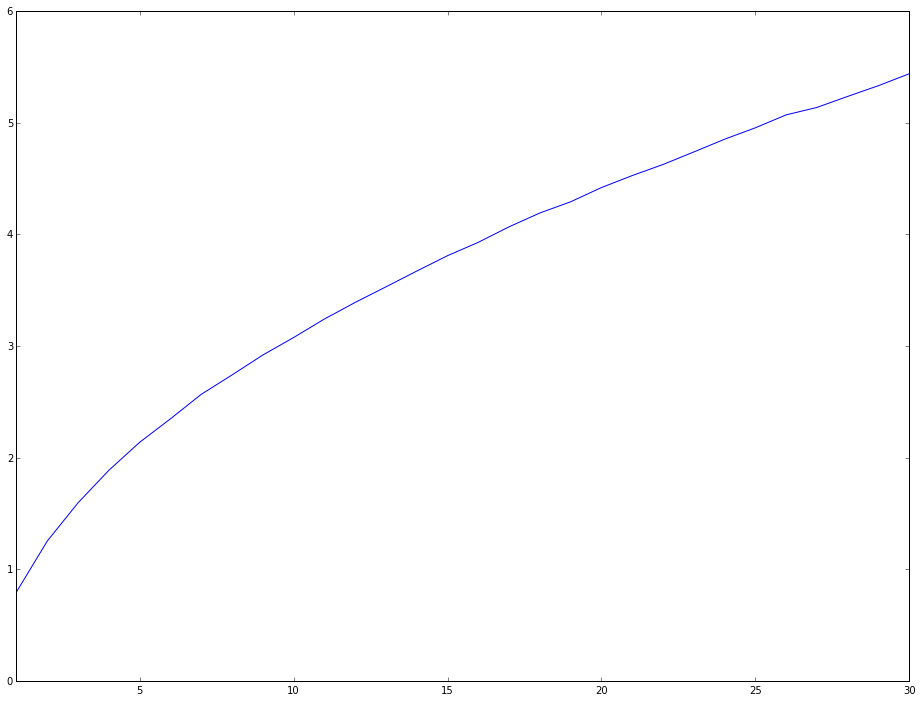

In [7]:
# Норма вектора из многомерного нормального распределения
def gaussian_dist(d, samples):
    vs = random.randn(samples, d)
    return average(linalg.norm(vs, axis=1))
plot_dim(gaussian_dist)

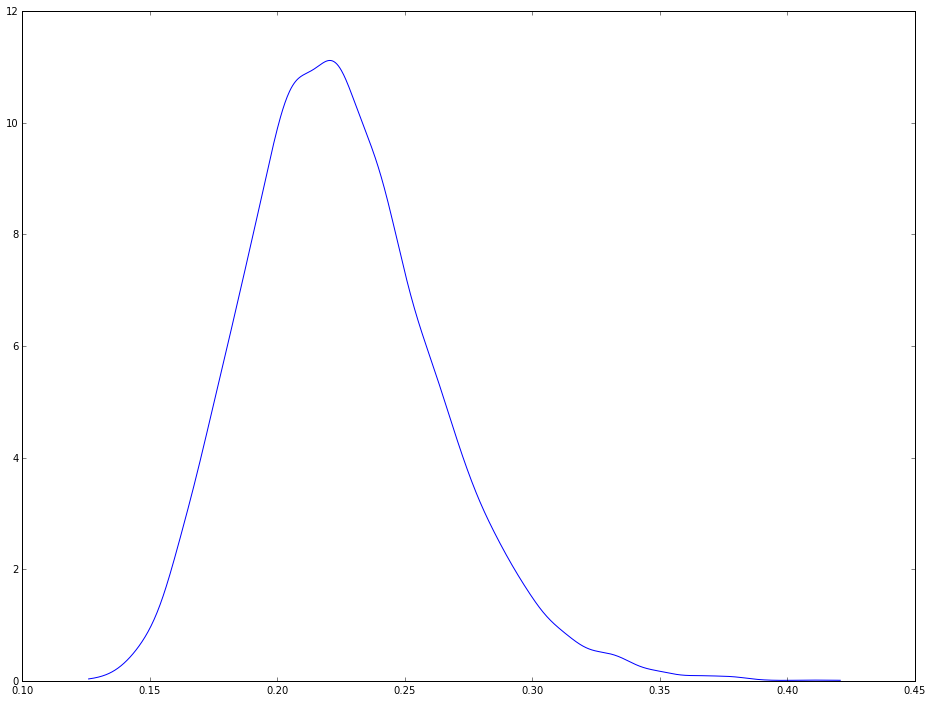

In [8]:
# Отличие между минимальной и максимальной нормой в наборе точек
def dist_ratio(d, points, samples):
    vs = random.random(size=(points, d))
    ns = linalg.norm(vs, axis=1)
    ma = max(ns)
    mi = min(ns)
    return (ma - mi) / mi
kde_plot(dist_ratio, 100, points=50)

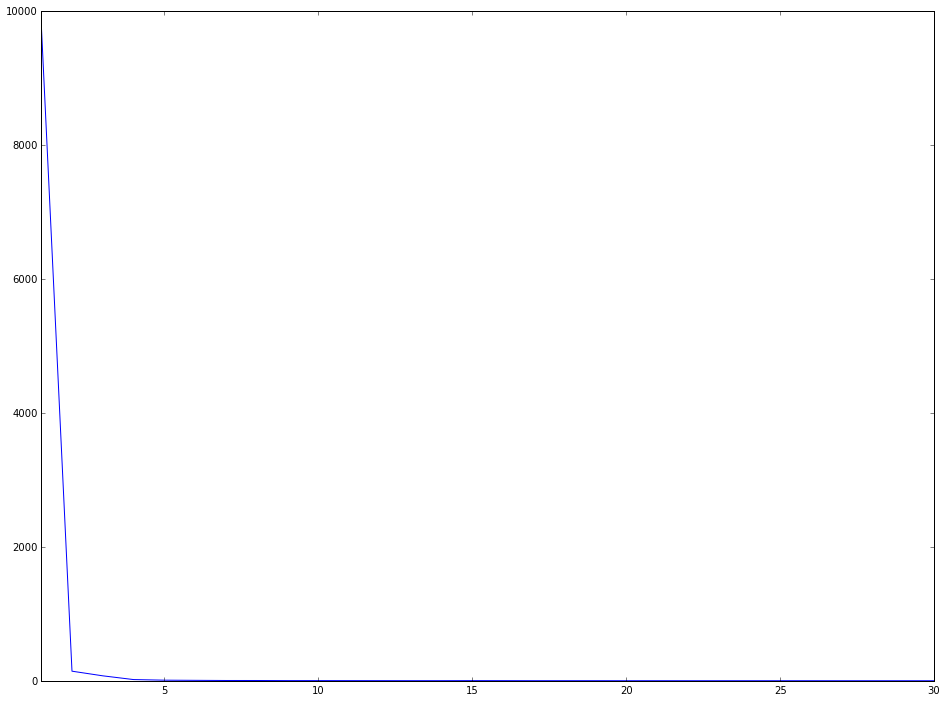

In [9]:
plot_dim(dist_ratio, points=10000)

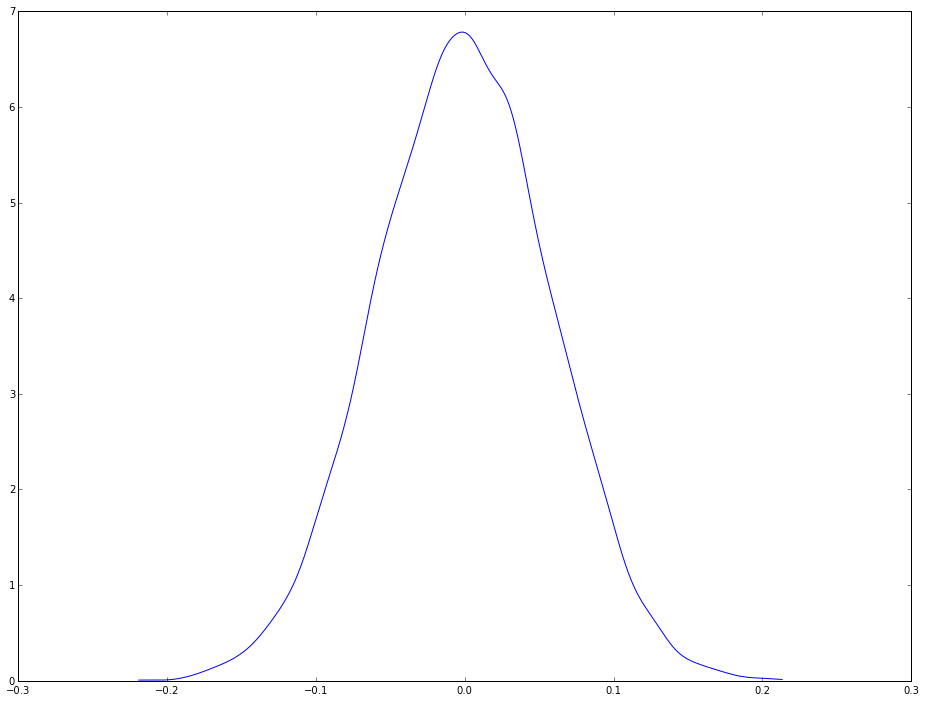

In [10]:
# Косинус угла между случайными векторами
def rand_cosine(d, samples):
    xs = random.random(size=(samples, d)) * 2 - 1
    ys = random.random(size=(samples, d)) * 2 - 1
    return average(dot(xs, ys.T).diagonal() / linalg.norm(xs, axis=1) / linalg.norm(ys, axis=1))
kde_plot(rand_cosine, 300)

# PCA

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()

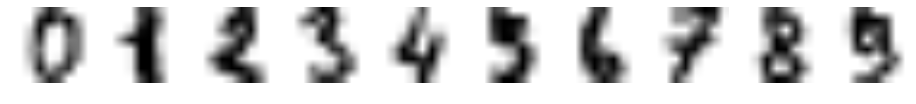

In [12]:
f, plots = plt.subplots(1, 10)
for i in range(10):
    plots[i].imshow(digits.images[i], cmap='binary');
    plots[i].axis('off');

In [13]:
from sklearn.decomposition import PCA

In [14]:
data = digits.data
n_components = range(1, 10) + range(10, 32, 2) + [32, 48, 64]
pca = [PCA(n_components=i) for i in n_components]
for p in pca:
    p.fit(data)
components = pca[len(pca) - 1].transform(data)

TypeError: unsupported operand type(s) for +: 'range' and 'range'

In [ ]:
f, plots = plt.subplots(len(n_components), 10)
f.set_size_inches(16, 2*len(n_components))
plt.subplots_adjust(hspace=0)
for i, p in enumerate(pca):
    for j in range(10):
        plots[i][j].imshow(p.inverse_transform(components[j, :p.n_components]).reshape((8,8)), cmap='binary');
        plots[i][j].axis('off')

In [ ]:
f, plots = plt.subplots(1, 5)
for n in range(5):
    plots[n].imshow(pca[4].inverse_transform([[0, 100][i == n] for i in range(5)]).reshape((8,8)), cmap='binary');
    plots[n].axis('off')

In [ ]:
best_pca = pca[len(pca) - 1]
plot([sum(best_pca.explained_variance_ratio_[:i]) for i in range(64)]);

In [ ]:
from sklearn.decomposition import RandomizedPCA

# ICA

http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html

In [ ]:
from sklearn.decomposition import FastICA

In [ ]:
n_components = 8
ica = FastICA(n_components=n_components).fit(data)
f, plots = plt.subplots(1, n_components)
for n in range(n_components):
    plots[n].imshow(ica.inverse_transform(np.array([[0, 100][i == n] for i in range(n_components)])).reshape((8,8)), cmap='binary');
    plots[n].axis('off')

<img src="http://scikit-learn.org/stable/_images/plot_ica_blind_source_separation_001.png" width=1024>

# t-SNA

<img src="https://lvdmaaten.github.io/tsne/examples/mnist_tsne.jpg" width=1024>

Ещё картинки: https://lvdmaaten.github.io/tsne/

Пример с лицами: http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#example-decomposition-plot-faces-decomposition-py

# Links

- http://colah.github.io/posts/2014-10-Visualizing-MNIST/
- https://www.kaggle.com/puyokw/digit-recognizer/clustering-in-2-dimension-using-tsne
- http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html
- https://www.reddit.com/r/MachineLearning/comments/47kf7w/scikitlearn_tsne_implementation/
- http://arxiv.org/pdf/1404.1100.pdf
- http://efavdb.com/independent-component-analysis/
- https://habrahabr.ru/post/267041/